Data Loaded Successfully

 Missing values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

 Decision Tree trained!

 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1166
           1       0.76      0.80      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233

 Accuracy Score: 0.79


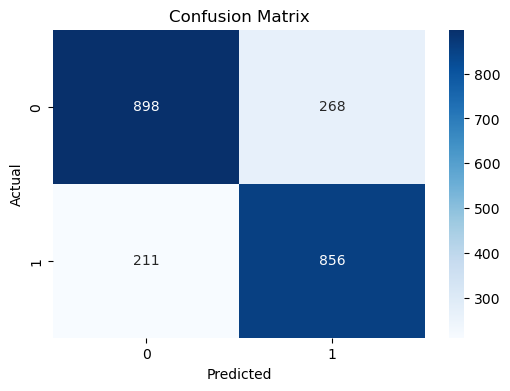

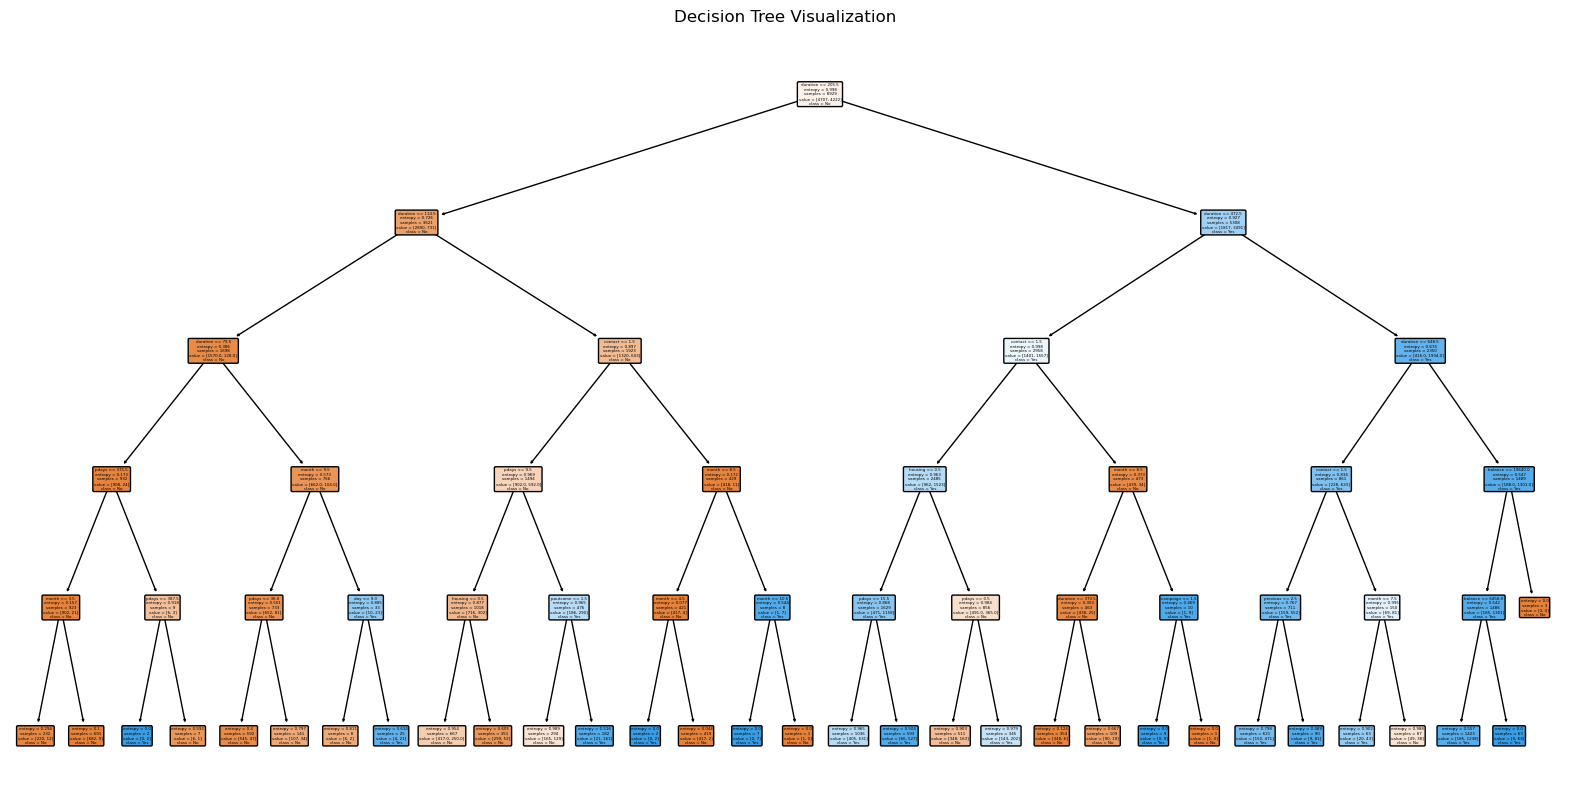

In [23]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load the dataset
df = pd.read_csv("bank.csv") 
print("Data Loaded Successfully")

# Step 3: Check for missing values
print("\n Missing values:")
print(df.isnull().sum())

# Step 4: Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Step 5: Define features and target
X = df.drop("deposit", axis=1)  
y = df["deposit"]  # Target column (0 or 1)

# Step 6: Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 7: Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X_train, y_train)
print("\n Decision Tree trained!")

# Step 8: Predict and evaluate
y_pred = clf.predict(X_test)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print(f" Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

# Step 9: Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 10: Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No", "Yes"], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
